In [1]:

import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [2]:
!kaggle datasets download -d vuppalaadithyasairam/bone-fracture-detection-using-xrays

 92% 159M/172M [00:01<00:00, 114MB/s]
100% 172M/172M [00:01<00:00, 110MB/s]


In [3]:

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [4]:
from zipfile import ZipFile
dataset = '/content/bone-fracture-detection-using-xrays.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
fractured = os.listdir('/content/archive (6)/train/fractured')
print(fractured[0:5])
print(fractured[-5:])

['72-rotated2-rotated2-rotated1.jpg', '59-rotated1-rotated3-rotated2.jpg', '25-rotated2-rotated2-rotated2.jpg', '21-rotated1-rotated1.jpg', '33-rotated1-rotated3-rotated1.jpg']
['44-rotated3-rotated3.jpg', '66-rotated2-rotated3-rotated3.jpg', '28-rotated3-rotated3.jpg', '18-rotated2-rotated3-rotated3.jpg', '32-rotated1-rotated2-rotated2.jpg']


In [6]:
not_fractured = os.listdir('/content/archive (6)/train/not fractured')
print(not_fractured[0:5])
print(not_fractured[-5:])

['59-rotated1-rotated3-rotated2.jpg', '25-rotated2-rotated2-rotated2.jpg', '21-rotated1-rotated1.jpg', '33-rotated1-rotated3-rotated1.jpg', '4-rotated3-rotated1-rotated3.jpg']
['18-rotated2-rotated3-rotated3.jpg', '12-rotated3-rotated3-rotated2-rotated1.jpg', '16-rotated3-rotated3-rotated3-rotated1.jpg', '7-rotated3-rotated2-rotated1.jpg', '32-rotated1-rotated2-rotated2.jpg']


In [7]:

print('Number of with fractured images:', len(fractured))
print('Number of without not fractured images:', len(not_fractured))

Number of with fractured images: 4480
Number of without not fractured images: 4383


In [8]:
fractured_labels = [1]*4480

not_fractured_labels = [0]*4383

In [9]:

print(fractured_labels[0:5])

print(not_fractured_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [10]:

print(len(fractured_labels))
print(len(not_fractured_labels))

4480
4383


In [11]:
labels = fractured_labels + not_fractured_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

8863
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


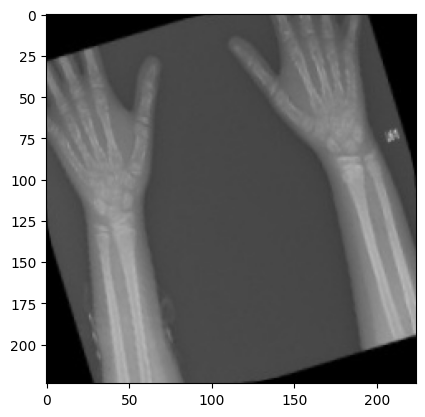

In [12]:
img = mpimg.imread('/content/archive (6)/train/fractured/10-rotated1-rotated1-rotated1.jpg')
imgplot = plt.imshow(img)
plt.show()

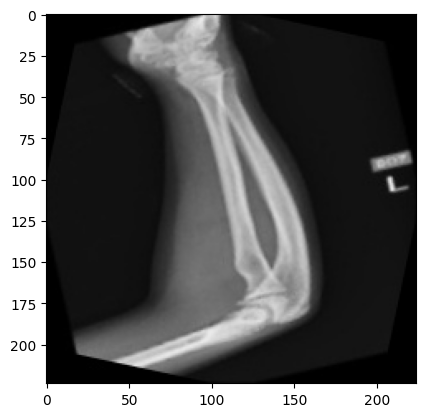

In [13]:
img = mpimg.imread('/content/archive (6)/train/not fractured/10-rotated1-rotated1-rotated1-rotated1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [16]:
import os
from PIL import Image
import numpy as np

fractured_path = '/content/archive (6)/train/fractured/'
not_fractured_path = '/content/archive (6)/train/not fractured/'

data = []
labels = []


def load_and_preprocess_images(directory, label):
    images = []
    for img_file in os.listdir(directory):
        img_path = os.path.join(directory, img_file)
        image = Image.open(img_path)

        image = image.convert('L')

        image = image.resize((175, 175))

        image_array = np.array(image)
        images.append(image_array)
        labels.append(label)
    return images


fractured_data = load_and_preprocess_images(fractured_path, label=1)


not_fractured_data = load_and_preprocess_images(not_fractured_path, label=0)

data = np.stack(fractured_data + not_fractured_data)
labels = np.array(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (8863, 175, 175)
Labels shape: (8863,)


In [17]:
X = np.array(data)

Y = np.array(labels)


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [19]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [20]:
import tensorflow as tf
from tensorflow import keras
import os
from PIL import Image
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [24]:
num_of_classes = 2

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(175, 175, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_of_classes, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [38]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
200/200 [==============================] - 6s 29ms/step - loss: 0.0246 - acc: 0.9909 - val_loss: 0.1547 - val_acc: 0.9676
Epoch 2/20
200/200 [==============================] - 5s 26ms/step - loss: 0.0345 - acc: 0.9886 - val_loss: 0.1650 - val_acc: 0.9619
Epoch 3/20
200/200 [==============================] - 6s 28ms/step - loss: 0.0318 - acc: 0.9893 - val_loss: 0.1605 - val_acc: 0.9676
Epoch 4/20
200/200 [==============================] - 6s 29ms/step - loss: 0.0292 - acc: 0.9901 - val_loss: 0.1619 - val_acc: 0.9619
Epoch 5/20
200/200 [==============================] - 6s 31ms/step - loss: 0.0288 - acc: 0.9893 - val_loss: 0.1510 - val_acc: 0.9577
Epoch 6/20
200/200 [==============================] - 5s 27ms/step - loss: 0.0238 - acc: 0.9920 - val_loss: 0.1870 - val_acc: 0.9633
Epoch 7/20
200/200 [==============================] - 5s 26ms/step - loss: 0.0199 - acc: 0.9928 - val_loss: 0.1431 - val_acc: 0.9704
Epoch 8/20
200/200 [==============================] - 5s 27ms/step - 

In [39]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

56/56 [==============================] - 1s 10ms/step - loss: 0.1420 - acc: 0.9774
Test Accuracy = 0.9774393439292908


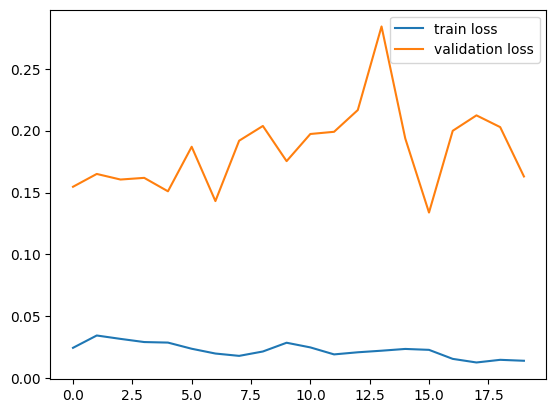

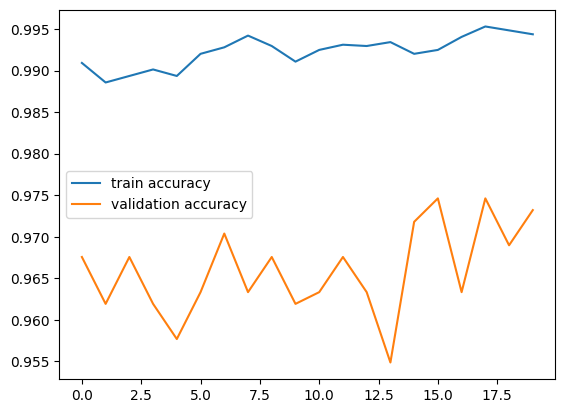

In [40]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/nfr 1.jpg


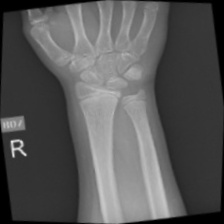

1/1 [==============================] - 0s 18ms/step
[[0.00783729 0.9852785 ]]
1
The bone is not fractured


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (175,175))

input_image_scaled = input_image_resized/255



input_image_scaled = input_image_scaled.astype(np.uint8)


input_image_resized = Image.fromarray(input_image_scaled).resize((175, 175))


input_image_resized = input_image_resized.convert('L')


input_image_resized = np.array(input_image_resized)


input_image_reshaped = np.reshape(input_image_resized, (1, 175, 175, 1))


input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The bone is fractured')

else:

  print('The bone is not fractured')